# Replicating 'Delivering Education to the Underserved through a Public-Private Partnership Program in Pakistan: A Randomized Controlled Study'



 This notebook contains the replication of
> Barrera-Osorio,Felipe & Blakeslee,David S.& Hoover, Matthew & Linden ,Leigh & Raju, Dhushyanth & Ryan ,Stephen P. , 2017. "Delivering education to the underserved through a public-private partnership program in Pakistan," Policy Research Working Paper Series 8177, The World Bank.

**Sources used to replicate the study can be found here : [code,data](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/UWXULC) and [paper](http://documents1.worldbank.org/curated/en/868011504015520701/pdf/WPS8177.pdf).**

**Information about navigating the notebook:**

* The notebook attempts to replicate the major results of the study. Tables and figures are labelled accordingly.
* I also add additional visualizations as seen fit to improve on the readability and lucidity of the study.
* Having originated from South Asia,I am also uniquely placed to enrich the paper with personal observations and interpretations of the results. They are accordingly marked.


## Table of Contents
* [Introduction](#first-bullet)
* [Second Bullet Header](#second-bullet)




In [19]:

options(warn=-1) #options(warn=0) to turn warnings back on

library(tidyverse)
library(haven)
library(dplyr)
library(sandwich)
library(stargazer)
library(stargazer)
library(IRdisplay)
library(magrittr)
library(xtable)
library(broom)
library(kableExtra)
library(patchwork)
library(ggthemes)

library(ggExtra)
#install.packages("choroplethrAdmin1")
library(choroplethrAdmin1)


package 'maps' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\abrah\AppData\Local\Temp\Rtmpsx3UiX\downloaded_packages



Attaching package: 'maps'

The following object is masked from 'package:purrr':

    map



**Importing Data**

In [2]:
child_data<- read_dta("data/ReStat_children.dta")
school_data<- read_dta("data/ReStat_schools.dta")

**Importing Functions to plot tables**

In [3]:
source("auxiliary/Table_functions.r")
source("auxiliary/plotting_functions.r")

## Introduction

- South Asian Countries, have long trailed in enabling access to quality education to it's rural population. Average student learning is dismally low in most developing countries. (Pritchett ,2013; UNESCO,2014). Governments  are resorting to supporting private schools in various ways to fill the gap left by public education systems. This study used a RCT (Randomized Controlled Trial), the short term impact of a public-private partnership program in Sindh province, Pakistan, called the Promoting Low-Cost Private Schooling in Rural Sindh Province. (PPRS)
- The main objective of the program was to increase access to schooling in marginalized areas, to reduce gender disparity in enrollment and to improve student learning, in a cost-effective manner. The program was funded by the provincial government, and designed and administered by the Sindh Education Foundation  (SEF), a semi-autonomous organization.
- **Brief Overview**
- **Benefits/Treatment**
    - The program offered local private entrepreneurs  who were qualified to participate benefits to run a tuition free, coeducational primary schools in educationally underserved villages. The per student subsidy was at less than half the per student cost for public primary and secondary education in the province. The subsidy was at 350 rupees ($5 in 2008 US dollars) and a gender differentiated subsidy, where the school received 450 rupees ($6.4) for each female student. 
    - The program school operator enjoyed freedom in how to structure and run school around existing guidelines.
    - A central challenge of the program was to improve enrollment and outcome for girl students in Pakistan. Not only on the demand side (demand for education among families) and the supply side ()distance and time from home to school, environmental conditions, school infrastructure, teacher characteristics). To address the gender disparity in education, 100 of the 200 program villages received a higher per-student subsidy for girls than for boys, with aim for incentivizing program schools to attract and keep girls in education.
    - To sum up, the treatments are :
        - Per student subsidy (for all program schools)
        - Girl specific student subsidy (50% of the program schools were given additional subsidy for girls on top of the per student subsidy)
- **Random Allocation**
    - The program was randomly allocated to 200 out of 263 qualifying villages in selected districts with poor education outcomes in the province.
    - After the random assignment was completed, SEF scaled down the original evaluation sample from 263 to 199 villages to correct for errors made in selecting the villages qualified in the initial round.
    - The effective sample size consisted of 82 villages under the gender uniform subsidy treatment, 79 under the gender differentiated treatment and 38 as controls.
    - Follow up measurement was conducted after the program schools had completed about 1.5 school years.
    - Mean household characteristics at baseline and follow up measurement in 199 villages were similar across the experimental groups.


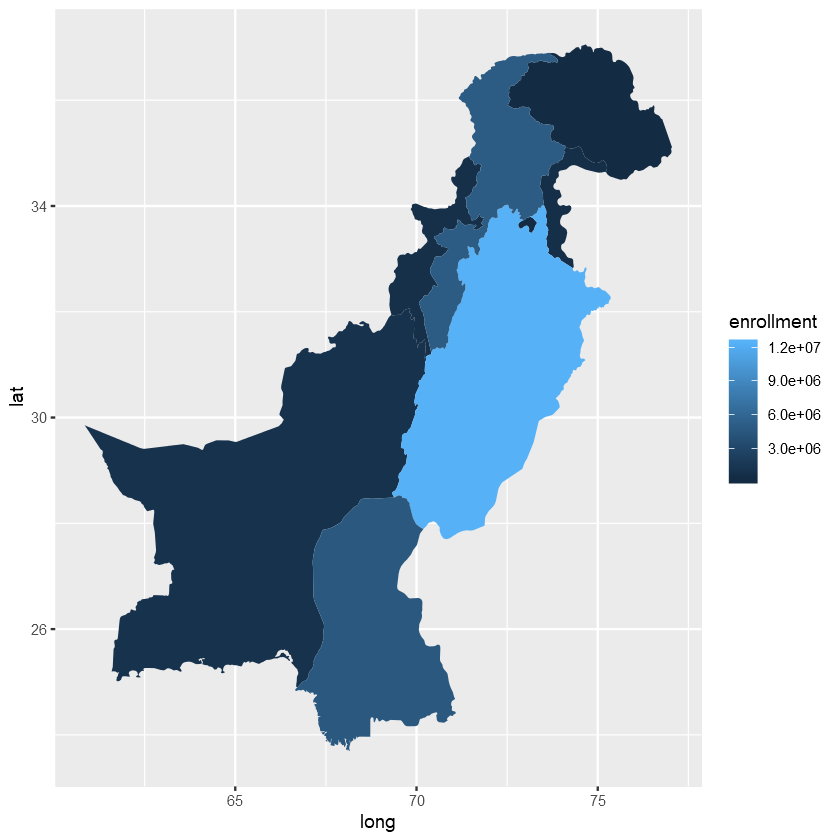

In [40]:


#data(admin1.map)
#pakistan = subset(admin1.map, admin == "pakistan")
#saveRDS(pakistan, file="data/Pakistan.Rda")

pakistan <- readRDS(file="data/Pakistan.Rda")
pakistan= pakistan %>% mutate(enrollment = case_when(region == "azad kashmir" ~ 547062, 
                                             region == "islamabad capital territory" ~215756,
                                             region == "punjab" ~ 12356585,
                                            region == "balochistan" ~922276 ,
                                            region == "khyber pakhtunkhwa province" ~ 4929405 ,
                                            region == "sindh" ~4572941 ,
                                            region == "federally administered tribal areas" ~ 687275,
                                            region == "northern areas" ~ 166721,
                                            TRUE ~ 0
                                            
                                            ))
  

  
ggplot(pakistan, aes(x = long, y = lat, group = group)) + geom_polygon(aes(fill = enrollment ))

#### Table 1 - Evaluation of Sample Sizes 

In [4]:
Table_1(child_data) 
#results match stata code but not data in paper

Number of:,Control,Pooled Treat.,Gender Uniform Treat.,Gender Differentiated Treat.,Total
Villages,38,161,82,79,199
Baseline Households,1451,6634,3532,3102,24962
Young Children,4567,20395,11036,9359,8085
Households,1069,4857,2554,2303,5926
Young children,3121,14647,7669,6978,17768


## Disentangling the Causal Mechanism

- In the model by Becker(1962), it is argued that households compare present and future costs and benefits of educating their children. The present costs include school fees and transportation costs. These tend to be the largest costs of primary schooling for households. The PPRS Program reduces the cost of transportation by situating schools in underserved villages and eliminates school fee by providing free schooling. The immediate effect should be an increased household demand for schooling, and accordingly, higher school enrollment.

- Much literature including (Burde and Linden 2013) as well as from quasi experimental evaluations (Foster and Rosenzweid, 1996 ; Duflo,2001; Berlinksi ,Galiani and Gertler 2009) prove that the relationship of distance from home to school is strong. The studies find that when schools are introduced to underserved areas, schooling increases dramatically. The effect of free schooling on enrollment is well documented, with a negative association between price and enrollment. (Deininger,2003; Barrera-Osorio, Linden and Urquiola, 2007)

- On the supply side, the subsidy is directly a function of the enrollment in the program schools, hence greatly incentivizing schools to enroll more students (and in the case of the gender differentiated subsidy - to enroll more female students). This could further lead to small incentives by the program schools themselves, for example - providing safe transportation and a safe schooling environment or even offering a small conditional cash transfer to girls.

- The positive effects on enrollment from interventions that reduce cost of enrolling in school contrast with the mixed effects of the interventions on student learning, measured through test scores. International evidence from conditional transfer programs suggests that exposure to more schooling does not necessarily higher test scores(Fizbein and Schady, 2009; Saavedra and Garcia 2012). More recently, international evidence points to positive effects on test scores, though the results depend on the specific design components of each individual program (Barham and Malccio,2013; Barrera-Osoria and Filmer, 2015)
- To address the complex problem of increasing test scores, the program offered training on school leadership and teaching, and supplied teaching and learning materials, both free of cost. The program also sponsors local private entrepreneurs to establish and operate schools.

- The operators of program schools had much more flexibility than government  schools to determine their input mix and to account for specific local conditions of the students, and adapt to demands of the households. (World Bank, 2004)
- **Disentangling Confounding Factors**
    - The major confounding factors are individual (student specific) factors - such as ability, motivation, health, perseverance, sex. and secondly the household and village/district level factors.
    - Disentangling the effect of innate ability on schooling ability to estimate the effect of the treatment is complex, as well as the motivation and perseverance, and peer groups. These greatly influence test scores and enrollment and require to 'be closed off' to estimate the effect of enrollment in program schools.
    - Household factors such as Access to water, food, parental guidance, electricity, parental wealth, distance to school are important as these factors play a much larger role in determining test scores and enrollment than the choice of school.
    - Accordingly, the causal mechanism looks like as follows -
     ![](https://firebasestorage.googleapis.com/v0/b/firescript-577a2.appspot.com/o/imgs%2Fapp%2FAbraham_MindDump%2F-ye3NZT4dW.png?alt=media&token=5a5af04a-b56d-4861-9e48-b074c776291f)


## Choice of Estimation Method - Randomized Controlled Trials

- Estimation of Treatment through **Randomized Controlled Trials **
    - Randomized controlled trials have been considered as the gold standard of policy evaluation since 1990s. Famous examples include Kremer et al, studies on Kenya (1994) and PROGRESA experiment (1997). Since 2000,this number of economic studies using RCT's have surged.
    - RCS have significant impact in economic research as -
        - They focus on identification of causal effects and are able to control for almost nearly all confounding factors. Any difference in treatment and control must be due to treatment.
        - Allow iterative experimentation.
            - Experiments are be continued indefinitely, experimenting on hypotheses, you can continue to experiment till clarity is achieved. eg. Duflo, Kremer, Robinson multi year work on fertilizer.
        - Most criticism of RCT's are imperfect randomization, non compliance, and attrition - not the validity of the method itself. (These criticisms will be discussed later in relation to this project.)
        - Allows innovation in measurement.
            - Different methods of survey collection: surveys, wearable technology, self reporting, web scraping,
            - These are not a requirement, but RCT's motivate experimentation as we are exactly aware of what are trying to measure, and do not concern ourselves with unobservable confounding factors.
    - In the context of this paper, RCT's allow us to close off the HH factors and Student/Individual  channels that affect the treatment - allowing us to estimate the effect of the green channel, the direct effects of the Subsidy on enrollment and scores.
    - However it is difficult to estimate the impact of intermediate factors downstream of the treatment due to collinear development of the same. This relies of existing literature to explore internal causal relationships that lead to the combined effects of the treatment.


## Weaknesses of the Approach

 Weaknesses of the **Randomized Controlled Trial Approach**.
    - The method of choice cannot guarantee proper disbursal of treatment. This is a classical weakness of Randomized Controlled studies as the key assumption of it's functioning is 'Completely Random Allocation'. In fact, medical trials require double blind randomization, where the researchers themselves are unaware of who the treatment was allocated to.
    - RCT are very effective at determining the effect, but it extremely difficult to justify the causal mechanism that caused the effect. It answers clearly the 'What?' but not the 'How' as a cross comparison of the groups essentially wash out non treatment effects.
    - Self Selection is a major threat to RCT's in it's usage in this paper. The authors themselves acknowledge this, as the threat of students switching from government schools and private schools to program schools cannot be controlled through this methodology. Secondly, the impact of government schools improving their allocation of resources in response to competition from program schools can potentially muddy the results.
- This is represented in the unblocked node 'Student Self Selection' which can affect the student specific characteristics channel - as more able, enthusiastic, disciplined students could self select themselves into program schools. This is especially worrying as in our model, we consider only one time period after treatment for comparison.
    - The Treatment on Treated effect is a mechanism through which the effect of the actual treatment doled out is estimated. It works on the principle that the treatment is not distributed according to the initial randomization, due to non takeup of the treatment. A robustness check on this is done in Table _.


## About the Data

- The foundation initially administered a vetting survey to select schools for the program. This survey, the base line survey  was conducted in February 2009. Following the base line survey, 263 villages were randomly assigned into two subsidy treatments, or to the control group.
- After the random assignment, SEF scaled down to 199 villages to correct for errors in the selection stage. These decisions were made without consideration for the treatment status assigned to the villages. The effective evaluation sample consisted of 82 villages under the gender uniform subsidy treatment,79 under the gender differentiated ones and 38 as controls.
- The schools were established in summer 2009. A follow up survey was conducted in April/May 2011, after the conclusion of the second school year under the program.
    - Baseline Survey
        - The baseline survey consisted of 
            - **A village survey** answered by village leaders. 
                - In each village the baseline survey also consisted of a survey of the entrepreneur and proposed teachers, as well as physical checks by the survey interviewers of the proposed schools sights. (Only certain variables available in data provided)
            - **A school survey** of all schools in the vicinity of the village .
                - GPS data was collected from all the schools, the proposed program site and surveyed households [[Questions for Authors]]
            - **A household survey** of 12 households randomly selected from the list submitted by the entrepreneur.
                - The household survey contained information on household ,the household head and on each child aged 5-9. 
    - Follow up survey
        - The follow up survey consisted of 3 instruments :
            - **A school survey**
                - The school survey collected information from interviews of head teachers and all other teachers, and visual checks by interviewers of head teachers and all other teachers and visual checks of the school infrastructural and environment conditions.
                - Also collected was attendance information through a headcount, with the attendance lists used during the household survey to verify the child's enrollment status reported by the household. [[Questions for Authors]] 
            - **A household survey**
                - The household survey was administered to households with at least one child aged 5–9. In large villages, up to 42 randomly sampled households in the village were interviewed; in villages with fewer than 42 households, which comprised the majority, all households in the village were interviewed. 
                - The survey was multi-topic, and had extensive modules on past and current schooling and other activities for children aged 5–17, answered by the household head or another primary adult household member.
            - **A child survey **
                - The child survey was administered to each child aged 5-9. It asked questions mainly on work activities performed inside and outside the home, past and current schooling and aspirations. Each child was then administered tests on language (either Urdu or Sindhi, as preferred) and mathematics
    - The **baseline survey interviewed 2,089 households and 5,556 children aged 5–9**, and** the follow-up survey interviewed 5,966 households and 17,720 children aged 5–17.**



## Table 2 Balance across  program and control villages

In [5]:
Table_2(child_data)

Characteristics,Baseline Control,Baseline Treatment - Control,Followup Control,Followup Treatment - Control
Child age,6.898,-0.084,7.354,0.081 *
Female,0.366,0.058,0.424,0.03 *
Child in School,0.233,0.029,0.284,-0.027
Child of hh head,9.749,-0.673,0.856,0.022 **
Household size,3.068,-0.293,7.221,-0.097
Number of Children,2.665,0.190,4.755,-0.14 **
Household head education,0.709,-0.010,2.631,0.127
Household head farmer,,,0.562,-0.016
Total land,,,4.229,0.898
Pukka house,,,0.056,-0.004


[@TEAM: Fix axes]

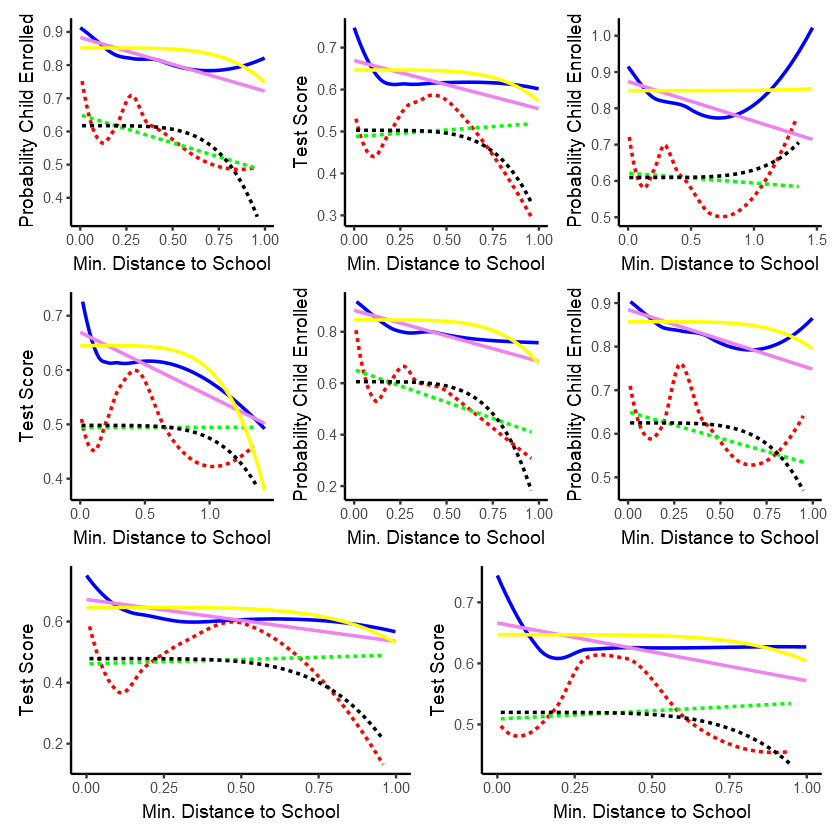

In [7]:

m1<-school_data %>% filter(min_school_dist_sef < 1)  %>% poly_plot(.,"min_school_dist_sef","fu_child_enrolled")  + labs(x ="Min. Distance to School",y= "Probability Child Enrolled")
m2<-school_data %>% filter(min_school_dist_sef < 1)  %>% poly_plot(.,"min_school_dist_sef","total_score_pct") + labs(x ="Min. Distance to School",y= "Test Score")
m3<-school_data %>% filter(min_school_dist_sef < 1.5)  %>% poly_plot(.,"min_school_dist_sef","fu_child_enrolled")  + labs(x ="Min. Distance to School",y= "Probability Child Enrolled")
m4<-school_data %>% filter(min_school_dist_sef < 1.5)  %>% poly_plot(.,"min_school_dist_sef","total_score_pct")+ labs(x ="Min. Distance to School",y= "Test Score")
m5<-school_data %>% filter( min_school_dist_sef < 1 & fu_female == 1)  %>% poly_plot(.,"min_school_dist_sef","fu_child_enrolled") + labs(x ="Min. Distance to School",y= "Probability Child Enrolled")
m6<-school_data %>% filter( min_school_dist_sef < 1 & fu_female == 0)  %>% poly_plot(.,"min_school_dist_sef","fu_child_enrolled") + labs(x ="Min. Distance to School",y= "Probability Child Enrolled")
m7<-school_data %>% filter( min_school_dist_sef < 1 & fu_female == 1)  %>% poly_plot(.,"min_school_dist_sef","total_score_pct")+ labs(x ="Min. Distance to School",y= "Test Score")
m8<-school_data %>% filter( min_school_dist_sef < 1 & fu_female == 0)  %>% poly_plot(.,"min_school_dist_sef","total_score_pct")+ labs(x ="Min. Distance to School",y= "Test Score")
figure_1.1<-(m1 |m2|m3)/(m4| m5|m6)/ (m7|m8)
print(figure_1.1)


Figure 2:

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


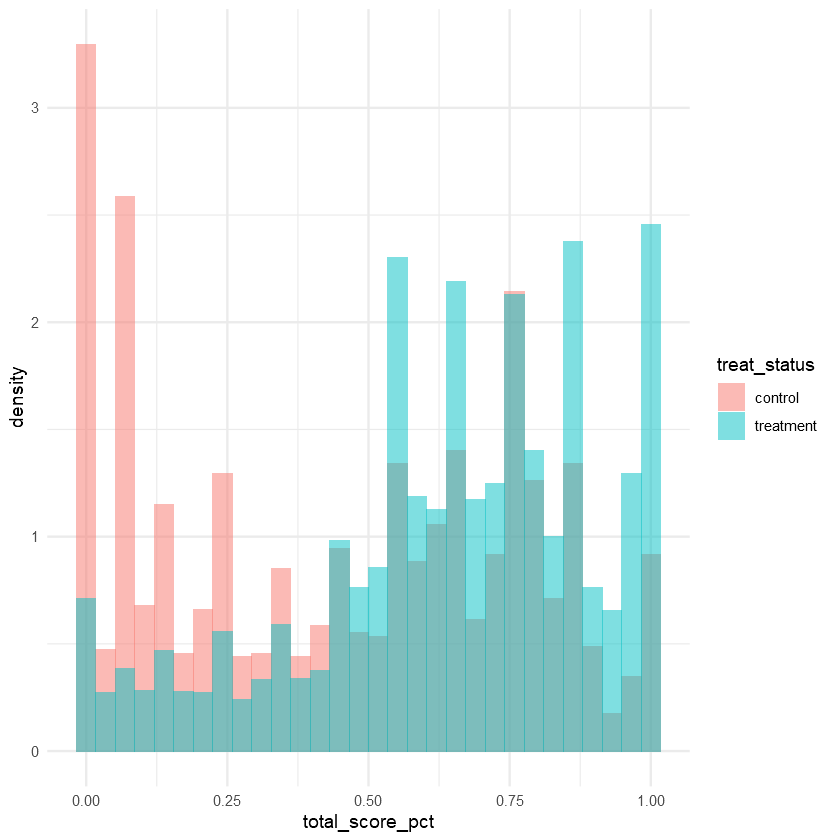

In [8]:

total_score_pct_cntrl <- school_data %>% filter(fu_child_level == 1 & fu_young_child == 1 & pooled_treatment==0 ) %>%select (total_score_pct)
total_score_pct_treat<- school_data %>% filter(fu_child_level == 1 & fu_young_child == 1 & pooled_treatment==1  )%>% select (total_score_pct)
combdat <- dplyr::bind_rows(list(control=total_score_pct_cntrl,treatment=total_score_pct_treat),.id="treat_status")
f_1<-ggplot(combdat, aes(total_score_pct, fill =treat_status )) + theme_minimal()+
   geom_histogram(alpha = 0.5, aes(y = ..density..), position = 'identity')
#f_2 <-ggplot(combdat, aes(total_score_pct, fill =treat_status )) + geom_density(alpha = 0.2) + theme_minimal()
#print(f_1/f_2)
print(f_1)


**Table 7**

In [9]:
Table_7(child_data)
figure_2.1_data <- Table_7(child_data)

Characteristics,Control,Treatment - Control,Female,Treatment,Treatment x Female
Civil Servant,0.123,0.006,-0.066 ***,0.014,-0.01
Doctor,0.109,0.055 ***,-0.031 .,0.067 ***,-0.024
Private Enterprise,0.013,0.003,-0.012 *,-0.001,0.009
Engineer,0.008,0.022 ***,0.002,0.029 ***,-0.016 *
Farmer,0.053,-0.038 ***,-0.077 ***,-0.063 ***,0.061 ***
Housewife,0.132,-0.055 ***,0.259 ***,-0.009,-0.121 ***
Laborer,0.011,-0.003,-0.006,-0.002,-0.002
Landlord,0.007,0.001,-0.008 *,0,0.002
Police/army/security,0.095,-0.015 *,-0.119 ***,-0.021 *,0.02
Teacher,0.28,0.058 ***,0.098 ***,0.028 .,0.056 *


results.df.Characteristics,results.df.fu_control,results.df.fu_treat,results.df.fu_female,results.df.fu_treat2,results.df.fu_treat_female
Civil Servant,0.122613674,0.0060913261,-0.065802049,0.0140382436,-0.009654363
Doctor,0.109491505,0.0548379502,-0.030561208,0.0671606676,-0.023985735
Private Enterprise,0.012508511,0.0027902467,-0.012297628,-0.0009562202,0.009157349
Engineer,0.007658101,0.0221319612,0.001815023,0.0290823041,-0.016023575
Farmer,0.053035079,-0.0375451756,-0.077068013,-0.0632903754,0.060700993
Housewife,0.131717650,-0.0554739559,0.259191196,-0.0085983693,-0.121157134
Laborer,0.010549853,-0.0026164361,-0.005950542,-0.0017229314,-0.001546949
Landlord,0.006809069,0.0006563108,-0.007512458,-0.0001970404,0.002420679
Police/army/security,0.095310149,-0.0151917459,-0.118817445,-0.0207927949,0.020209707
Teacher,0.280483192,0.0577061819,0.097630168,0.0284925969,0.056359048


Characteristics,Control,Treatment - Control,Female,Treatment,Treatment x Female
Civil Servant,0.123,0.006,-0.066 ***,0.014,-0.01
Doctor,0.109,0.055 ***,-0.031 .,0.067 ***,-0.024
Private Enterprise,0.013,0.003,-0.012 *,-0.001,0.009
Engineer,0.008,0.022 ***,0.002,0.029 ***,-0.016 *
Farmer,0.053,-0.038 ***,-0.077 ***,-0.063 ***,0.061 ***
Housewife,0.132,-0.055 ***,0.259 ***,-0.009,-0.121 ***
Laborer,0.011,-0.003,-0.006,-0.002,-0.002
Landlord,0.007,0.001,-0.008 *,0,0.002
Police/army/security,0.095,-0.015 *,-0.119 ***,-0.021 *,0.02
Teacher,0.28,0.058 ***,0.098 ***,0.028 .,0.056 *


### Tornado Graph

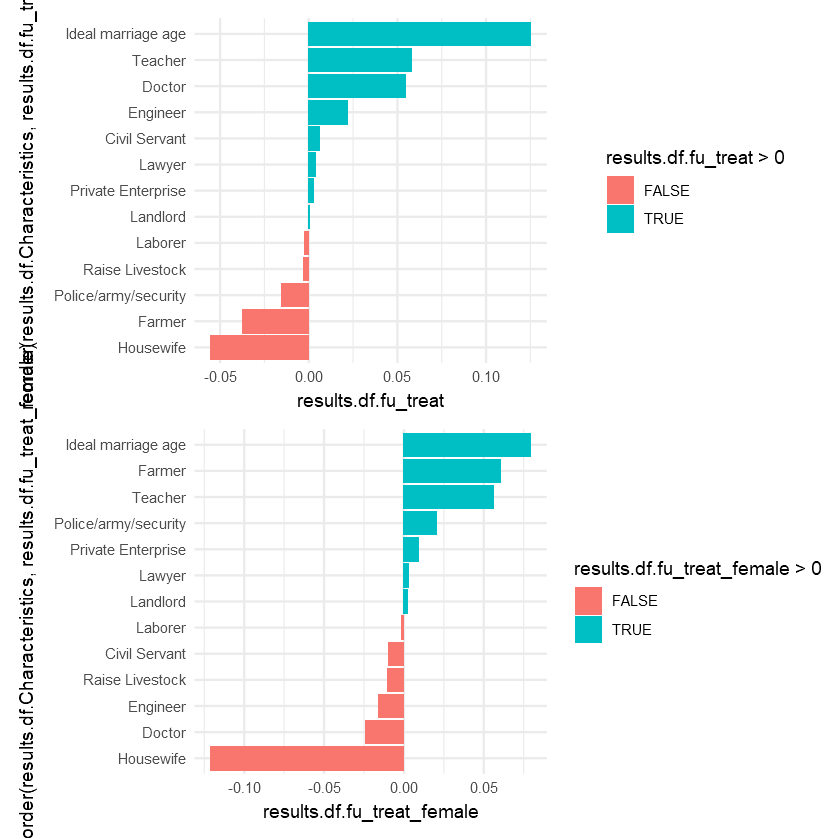

In [10]:
a<-ggplot(data = figure_2.1_data,
          aes(x = reorder(results.df.Characteristics,results.df.fu_treat), y = results.df.fu_treat,
           fill = results.df.fu_treat > 0))+ theme_minimal()+ geom_bar(stat = "identity")+ coord_flip()                                                     
b<-ggplot(data = figure_2.1_data,
           aes(x = reorder(results.df.Characteristics,results.df.fu_treat_female), y = results.df.fu_treat_female,
           fill = results.df.fu_treat_female > 0))+ theme_minimal()+ geom_bar(stat = "identity")+ coord_flip()    
                                                 
figure_2.1<-(a/b )
print(figure_2.1)
                                                 
                                                 

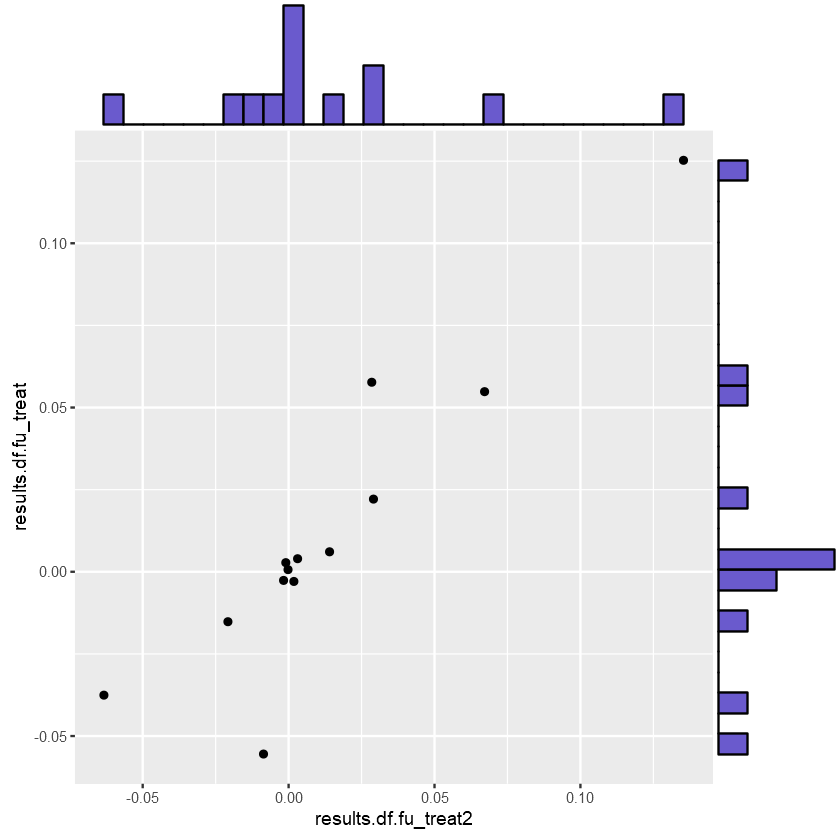

In [11]:
p <- ggplot(data = figure_2.1_data,
          aes(x =results.df.fu_treat2, y = results.df.fu_treat)) +
      geom_point() +
      theme(legend.position="none")
p1 <- ggMarginal(p, fill = "slateblue",type="histogram")
p1

**Table 8 Characteristics by School Type**

In [12]:

Table_8(school_data)

Characteristics,Program Schools,Program - Govt. Schools,Program - Pvt. Schools
Days operational,5.118,0.515,0.342
Open admission,0.859,-0.024,-0.072
Uniform required,0.024,0.024,-0.315
Tuition required,0.000,0.000,-0.443
Medium:Sindhi,0.613,-0.370,-0.024
Medium:English,0.309,0.309,-0.054
Total Teachers,3.781,0.940,-2.541
Female Teachers,1.988,1.451,-3.439
Post secondary,1.890,-0.454,-1.499
<5 yrs Experience,3.132,2.478,0.940


**Table 4 Test Scores**

In [13]:
Table_4(child_data)

, Program Impacts on Test Scores , Dependent variable: , , Math Score Urdu Score Total Score , (1) (2) (3) (4) (1) (2) (3) (4) (1) (2) (3) (4) , Pooled Treatment 0.532 *** 0.522 *** 0.521 *** 0.627 *** 0.503 *** 0.494 *** 0.492 *** 0.591 *** 0.537 *** 0.527 *** 0.525 *** 0.631 *** , (0.027) (0.027) (0.027) (0.024) (0.026) (0.026) (0.026) (0.023) (0.026) (0.026) (0.026) (0.023) , , Child Controls no yes yes yes no yes yes yes no yes yes yes , HH Controls no no yes yes no no yes yes no no yes yes , District Fixed Effects no no no yes no no no yes no no no yes , Observations 10,464 10,464 10,464 10,464 10,521 10,521 10,521 10,521 10,426 10,426 10,426 10,426 , R 2 0.049 0.076 0.087 0.189 0.049 0.073 0.085 0.188 0.054 0.082 0.093 0.204 , Adjusted R 2 0.049 0.076 0.086 0.187 0.049 0.073 0.084 0.186 0.054 0.082 0.092 0.202 , Residual Std. Error 1.019 (df = 10462) 1.005 (df = 10459) 0.999 (df = 10451) 0.942 (df = 10442) 0.961 (df = 10519) 0.949 (df = 10516) 0.943 (df = 10508) 0.889 (df = 10499) 0.977 (df = 10424) 0.963 (df = 10421) 0.957 (df = 10413) 0.898 (df = 10404) , F Statistic 544.136 *** (df = 1; 10462) 215.461 *** (df = 4; 10459) 83.148 *** (df = 12; 10451) 115.798 *** (df = 21; 10442) 545.966 *** (df = 1; 10519) 208.123 *** (df = 4; 10516) 81.648 *** (df = 12; 10508) 115.409 *** (df = 21; 10499) 597.368 *** (df = 1; 10424) 232.581 *** (df = 4; 10421) 89.321 *** (df = 12; 10413) 126.839 *** (df = 21; 10404) , Note: * p<0.1; ** p<0.05; *** p<0.01 ,

#### Table 6: Gender differential impacts by subsidy treatment

In [14]:
Table_6(child_data)

, Gender differential impacts by the subsidy treatment , Dependent variable: , , Reported Enrollment Highest Grade attained Test Scores , Treatment gender uniform 0.335 *** 0.415 *** 0.576 *** , (0.017) (0.033) (0.045) , , Treatment gender uniform x Female -0.038 -0.099 ** 0.087 , (0.027) (0.050) (0.067) , , Treatment gender differentiated 0.316 *** 0.375 *** 0.636 *** , (0.017) (0.034) (0.045) , , Treatment gender differentiated x Female -0.001 0.051 0.043 , (0.026) (0.050) (0.067) , , Observations 11,658 11,152 10,376 , R 2 0.110 0.226 0.204 , Adjusted R 2 0.108 0.224 0.202 , Residual Std. Error 0.447 (df = 11633) 1.184 (df = 11127) 0.898 (df = 10352) , F Statistic 59.628 *** (df = 24; 11633) 135.473 *** (df = 24; 11127) 115.093 *** (df = 23; 10352) , Note: * p<0.1; ** p<0.05; *** p<0.01 ,